In [ ]:
#Capstone Project - TWO
#House Price Prediction

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
#Importing python libraries, pandas, latplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file

In [ ]:
#Load The Housing Data

In [2]:
#Loading the data file for this project from raw_data directory
housing_data = pd.read_excel('../raw_data/HousePricePrediction.xlsx')

In [3]:
#Calling the info method on housing_data to see a summary of the data
housing_data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  

In [ ]:
#'SalePrice' column is the data of the housing sale price for this data set mentioned in dollar amount. Some rows have missing data for this.

In [4]:
#Calling the head method on housing_data to print the first several rows of the data
#Checking the first 5 rows of data for 'housing_data' to get idea about the data.
housing_data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
#'BsmtFinSF2' values are 0.0

In [ ]:
#Explore The Data

In [5]:
#Checking rows and columns of the dataset
housing_data.shape

(2919, 13)

In [6]:
#Number Of Missing Values By Column
#Counting (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#housing_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Ordering them (increasing or decreasing) using sort_values
#Calling `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'

missing = pd.concat([housing_data.isnull().sum(), 100 * housing_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count') 

,count,%
Id,0,0.000000
MSSubClass,0,0.000000
LotArea,0,0.000000
LotConfig,0,0.000000
BldgType,0,0.000000
OverallCond,0,0.000000
YearBuilt,0,0.000000
YearRemodAdd,0,0.000000
Exterior1st,1,0.034258
BsmtFinSF2,1,0.034258


In [7]:
#'Id' column wouldn't participate in prediction it seems, due to this dropping it.
housing_data.drop(['Id'],
             axis=1,
             inplace=True)

In [ ]:
#SalePrice column has most missing value.This is desired target quantity as well,
#isnull() is not the only indicator of missing data. Sometimes 'missingness' can be encoded, perhaps by a -1 or 999.
#Such values are typically chosen because they are "obviously" not genuine values. 

In [8]:
#Replacing SalesPrice empty values with their mean values,
housing_data['SalePrice'] = housing_data['SalePrice'].fillna(
  housing_data['SalePrice'].mean())

In [9]:
#Since there are very few empty records, dropping those.
new_housing_data = housing_data.dropna()

In [10]:
#Checking which records still ahve null values.
new_housing_data.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [ ]:
#Categorical Features

In [11]:
#Use housing_data's `select_dtypes` method to select columns of dtype 'object'
new_housing_data.select_dtypes(include='object')

,MSZoning,LotConfig,BldgType,Exterior1st
0,RL,Inside,1Fam,VinylSd
1,RL,FR2,1Fam,MetalSd
2,RL,Inside,1Fam,VinylSd
3,RL,Corner,1Fam,Wd Sdng
4,RL,FR2,1Fam,VinylSd
...,...,...,...,...
2914,RM,Inside,Twnhs,CemntBd
2915,RM,Inside,TwnhsE,CemntBd
2916,RL,Inside,1Fam,VinylSd
2917,RL,Inside,1Fam,HdBoard


In [12]:
#Use pandas' Series method `value_counts` to find any duplicated MSZoning
new_housing_data['MSZoning'].value_counts().head()

MSZoning
RL         2264
RM          459
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [ ]:
#Categorical data from colums 'MSZoning', 'LotConfig', 'BldgType', 'Exterior1st' does not need to be unique.

In [13]:
#Checking shape of new_housing_data
new_housing_data.shape

(2913, 12)

In [ ]:
#Intial data file has (2919, 13). 6 rows have been removed and 1 column from intial data file(housing_data). 
#New data file(new_housing_data has rows and columns (2913, 12).

In [14]:
# Calculate average sale price by 'MSZoning' and sort by the average
zone_price_means = new_housing_data.groupby('MSZoning')[['SalePrice']].mean()
zone_price_means.head()

,SalePrice
MSZoning,
C (all),138363.917534
FV,196396.276949
RH,150544.075342
RL,186047.720860
RM,154987.096317


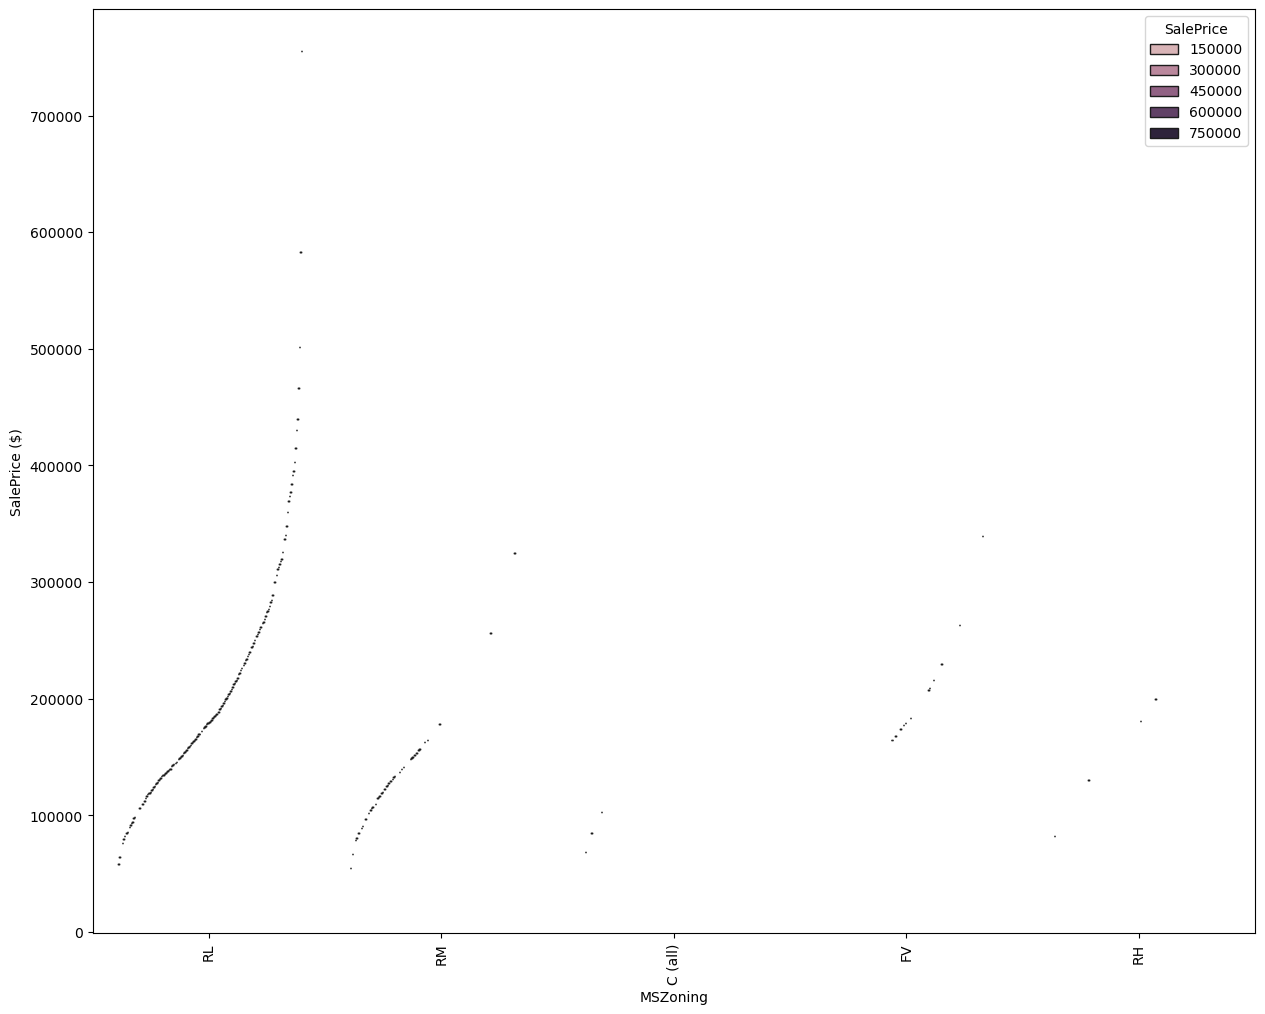

In [15]:
#Creating a seaborn boxplot of the sale price dataframe we created above,
#with 'MSZoning' on the x-axis, 'SalePrice' as the y-value, and a hue that indicates 'SalePrice'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(15, 12))
sns.boxplot(x='MSZoning', y='SalePrice', hue='SalePrice', data=new_housing_data)
plt.xticks(rotation='vertical')
plt.ylabel('SalePrice ($)')
plt.xlabel('MSZoning');

In [ ]:
#Numeric Features

In [16]:
#Calling new_housing_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
new_housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2913.0,57.190182,42.538067,20.0,20.0,50.00000,70.00000,190.0
LotArea,2913.0,10137.665980,7832.598853,1300.0,7476.0,9450.00000,11553.00000,215245.0
OverallCond,2913.0,5.566770,1.108977,1.0,5.0,5.00000,6.00000,9.0
YearBuilt,2913.0,1971.391349,30.258751,1872.0,1954.0,1973.00000,2001.00000,2010.0
YearRemodAdd,2913.0,1984.314452,20.864950,1950.0,1965.0,1993.00000,2004.00000,2010.0
BsmtFinSF2,2913.0,49.667353,169.338330,0.0,0.0,0.00000,0.00000,1526.0
TotalBsmtSF,2913.0,1052.805012,439.688510,0.0,793.0,990.00000,1302.00000,6110.0
SalePrice,2913.0,180921.195890,56232.174632,34900.0,163000.0,180921.19589,180921.19589,755000.0


In [ ]:
#Distributions Of Feature Values

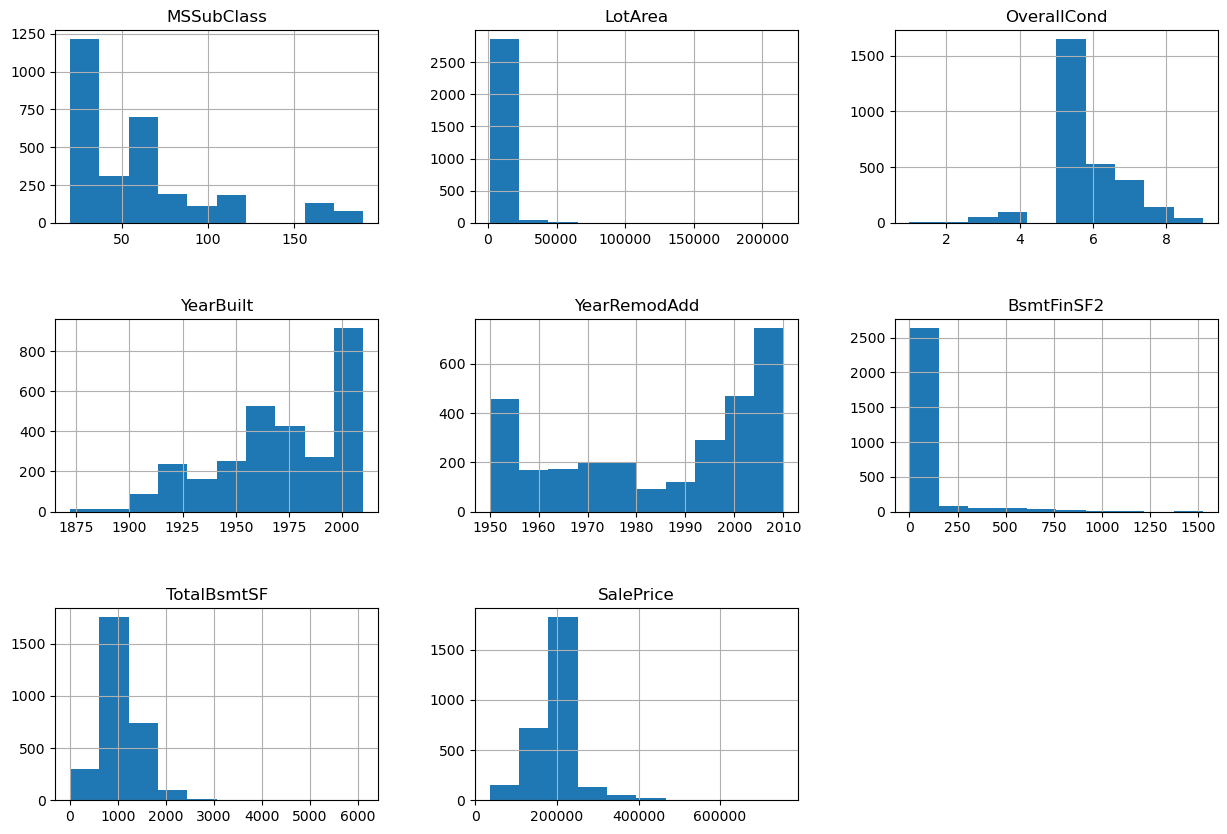

In [17]:
#Calling new_housing_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
new_housing_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

In [19]:
#Checking data types of columns.
new_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2913 non-null   int64  
 1   MSZoning      2913 non-null   object 
 2   LotArea       2913 non-null   int64  
 3   LotConfig     2913 non-null   object 
 4   BldgType      2913 non-null   object 
 5   OverallCond   2913 non-null   int64  
 6   YearBuilt     2913 non-null   int64  
 7   YearRemodAdd  2913 non-null   int64  
 8   Exterior1st   2913 non-null   object 
 9   BsmtFinSF2    2913 non-null   float64
 10  TotalBsmtSF   2913 non-null   float64
 11  SalePrice     2913 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 295.9+ KB


In [20]:
#saving the data to a new csv file,save_file utility only supports csv file, due to thsi saving in csv file.
datapath = '/data'
save_file(new_housing_data, 'new_housing_data_cleaned.csv', datapath)

Directory /data was created.
Writing file.  "/data\new_housing_data_cleaned.csv"
